# Assignment 1

### 1. get data

We defined a function named param to initial the parameters which are used in this work. After that the function named getData is to generate datas

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

def param(d,num,lam,epochs,sigma,mean,lemda_reg):
    # define test parameters
    d = d
    # dimention
    num = num
    theta_old = np.random.uniform(0,1,d)
    lam = lam 
    # lambda
    epochs = epochs
    sigma = sigma
    mean = mean
    lemda_reg=lemda_reg
    return d,num,lam,epochs,sigma,mean,lemda_reg,theta_old


def getData(num, sigma, mean):
    X = np.random.random_sample(num)
    pi = np.pi
    Z = np.random.normal(mean, sigma, num)
    Y = np.cos(2*pi*X) + Z
    return X, Y

### 2. get the model

The function of poly is to get the model by using numpy function named numpy.vander():
    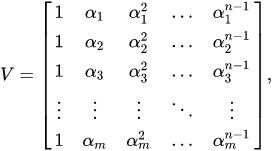

In [3]:
def poly(X_data,Y_data,d,num,lam,epochs,sigma,mean,lemda_reg):
    # for X
    X1 = np.vander(X_data, d, increasing=True)
    X = np.transpose(X1)
    # for Y
    Y = Y_data.reshape(1, num)
    return X,Y

### 3.  get MSE

In [4]:
from numpy import linalg as LA
def getMSE(X, Y, num, theta_old,Lemda_reg):
    MSE = ((1/num)*np.sum(np.square(Y - np.matmul(theta_old, X))))+(Lemda_reg*np.square(LA.norm(theta_old)))
    return MSE

### 4. fit the datas

In this part, we can use this function to fit our data based on Gradient Descent. The return results are the modified parametes for polynomial regression.

In [58]:
from numpy import linalg as LA
def fitData_l2(X, Y, d, num, theta_old,lam, epochs, sigma, mean,lemda_reg):
    X1,Y1=poly(X,Y,d,num,lam,epochs,sigma,mean,lemda_reg)
    for i in range(epochs):
        dL = (1/num)*2*(np.matmul((Y1-np.matmul(theta_old, X1)), np.transpose(X1)))
        b=theta_old.flatten()
        l2_reg=2*lemda_reg*np.sum(b)
        theta_old = theta_old + lam*2*dL+ l2_reg           
#     pdb.set_trace()
    theta_new = theta_old
    Y_new = np.matmul(theta_old, X1).reshape(num,1)    
    Ein = getMSE(X1, Y1, num, theta_new,lemda_reg)
    X_test, Y_test=getData(num, sigma, mean)
    X_test, Y_test=poly(X_test, Y_test,d,num,lam,epochs,sigma,mean,lemda_reg)
    Eout = getMSE(X_test, Y_test, num, theta_new,lemda_reg)
    return theta_new,Ein,Eout, Y_new

### 5. experiment function

In this part, the average of Ein, Eout and E_bias can be showed and the fitting graphs can be seen as well.

In [37]:
import matplotlib.pyplot as plt
import pdb
def experiment(N,d,sigma,mean,lam,epochs,lemda_reg,M_trials):    
    d,num,lam,epochs,sigma,mean,lemda_reg,theta_old=param(d,N,lam,epochs,sigma,mean,lemda_reg)
    theta_old = theta_old.reshape(1, d)
    Eino=0
    Eouto=0
    M=M_trials
    X,Y=getData(num, sigma, mean)
    theta_sum = 0
    for i in range(M_trials):        
        theta_new,Ein,Eout, Y_new=fitData_l2(X, Y, d, num, theta_old,lam, epochs, sigma, mean,lemda_reg)
        theta_sum += theta_new
        theta_old = theta_new
        Ein=Ein+Eino
        Eino=Ein
        Eout=Eout+Eouto
        Eouto=Eout   
    theta_old=theta_sum/M
    X1,Y1=getData(num, sigma, mean)
    X1,Y1=poly(X1,Y1,d,num,lam,epochs,sigma,mean,lemda_reg)
    E_bias=getMSE(X1, Y1, num, theta_old,lemda_reg)
    axes = plt.subplot() 
    t1 = axes.scatter(X, Y, s=20, c='blue',label="original data")
    t2 = axes.scatter(X, Y_new.flatten(), s=20 , c='red', label="predict data")
#     plt.figure(figsize=(50, 50))
    plt.legend(loc='upper left')
    plt.show()        
    return Ein/M,Eout/M,E_bias

### 6.Testing functions 
The regularization_term is 0 in the first example and another example shows the results with the regularization  term which equals 0.001.

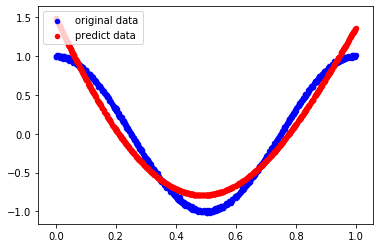

Without regularization:
Ein = 0.03500156848012579
Eout = 0.03475688126468943
E_bias = 0.03248371593787183


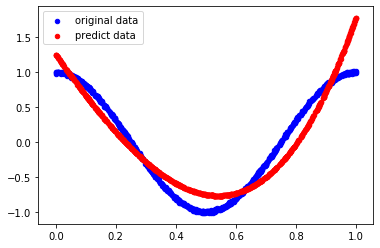

With regularization:
Ein = 0.10706563671123213
Eout = 0.10795743938535635
E_bias = 0.09658935632074034


In [61]:
# Data,Degree,Sigma,Mean,learning_rate,epochs,Regularization_term,M_trials

# Without regularization:
EIN1,EOUT1,EBIAS1=experiment(1000, 5, 0.01, 0, 0.1, 1000, 0, 50)
print("Without regularization:")
print("Ein = {0}".format(EIN1))
print("Eout = {0}".format(EOUT1))
print("E_bias = {0}".format(EBIAS1))

# With regularization:
EIN2,EOUT2,EBIAS2=experiment(1000, 5, 0.01, 0, 0.1, 100, 0.001, 50)
print("With regularization:")
print("Ein = {0}".format(EIN2))
print("Eout = {0}".format(EOUT2))
print("E_bias = {0}".format(EBIAS2))

### 7. main function with all combinations

In this part, we put a part of examples and print the results and print the result in the last group.

(20,)


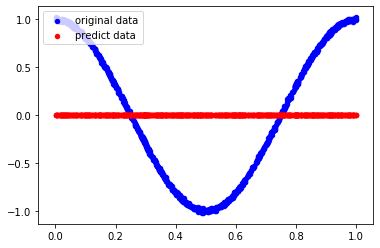

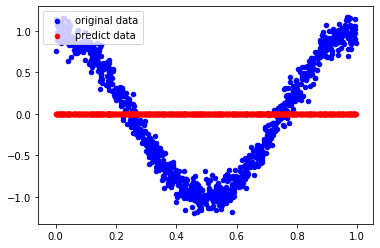

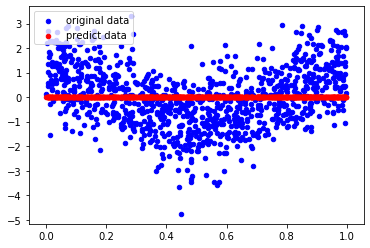

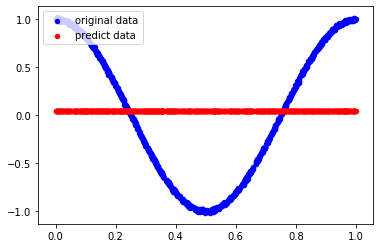

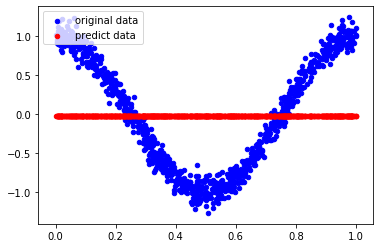

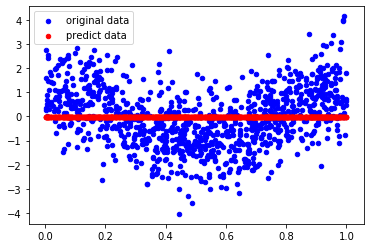

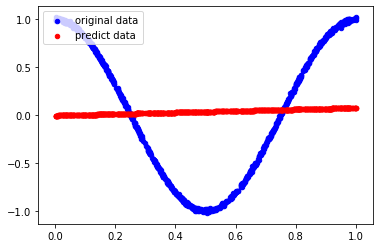

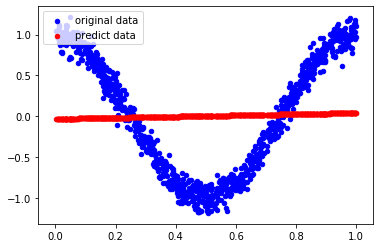

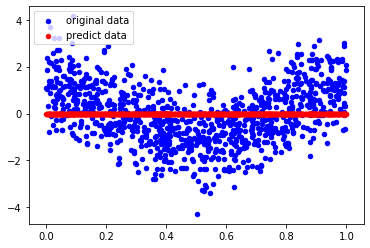

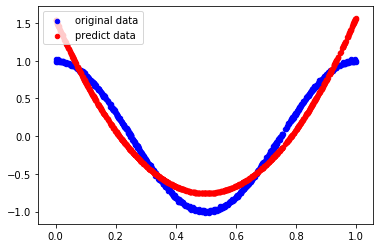

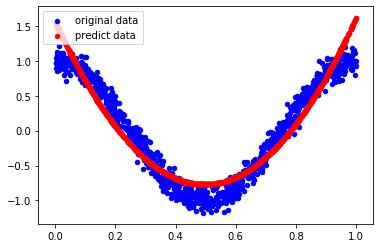

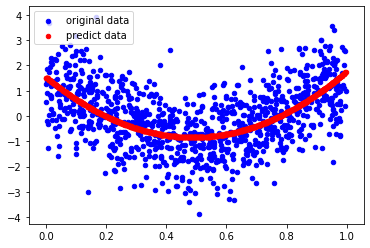

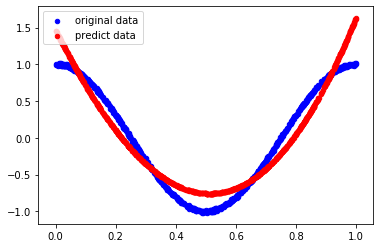

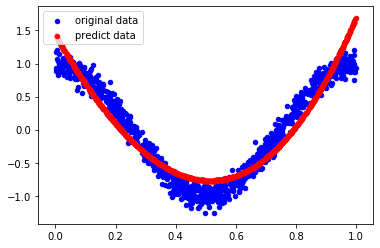

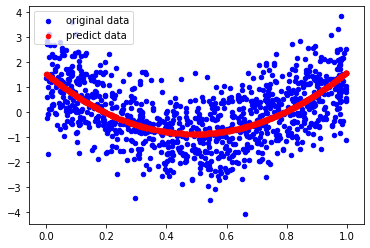

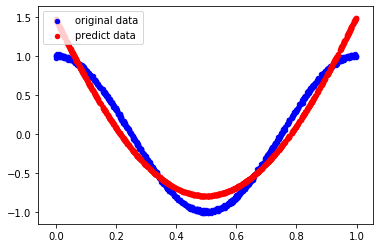

Ein = 0.1664377122992789 
Eout = 0.1663810949898123 
E_bias = 0.15643745314980728


In [53]:
def main():
    n_array = np.array([1000, 2, 5, 10, 20, 50, 200])  # number arrary
    d_array = np.empty([20], dtype=int)  # degree array
    print(d_array.shape)
    for i in range(20):
        d_array[i] = i
    sigma_array = np.array([0.01, 0.1, 1])  # variance arrary
    mean = 0
    lam = 0.1
    epochs = 1000
    lemda_reg = 0.001
    M_trials = 50
    for N in n_array:
        for d in d_array:
            for sigma in sigma_array:
                Ein, Eout, E_bias = experiment(N,d,sigma,mean,lam,epochs,lemda_reg,M_trials)
                if(N==1000 and d==5 and sigma==0.01):
                    print("Ein = {0} \nEout = {1} \nE_bias = {2}".format(Ein, Eout, E_bias))
                    break
            if(d == 5):
                break
        if (N==1000):
            break
            
if __name__=="__main__":
    main()